(mass)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`资产定价：有限状态模型 <single: Asset Pricing: Finite State Models>`

```{index} single: Models; Markov Asset Pricing
```

```{contents} 目录
:depth: 2
```

```{epigraph}
"对几何级数的一点了解就能走很远" -- Robert E. Lucas, Jr.
```

```{epigraph}
"资产定价就是关于协方差" -- Lars Peter Hansen
```

除了Anaconda中已有的库外，本讲座还需要以下库：

In [1]:
!pip install quantecon

## 概述

```{index} single: Markov Asset Pricing; Overview
```

资产是对一个或多个未来收益的权利要求。

资产的现货价格主要取决于

* 预期收入流
* 风险态度
* 时间偏好率

在本讲中，我们将探讨一些标准定价模型和股息流规格。

我们研究在这些不同情况下价格和股息-价格比率如何变化。

我们还将研究创建和定价重新打包收入流的*衍生*资产。

本讲的主要工具包括

* 马尔可夫过程
* 预测马尔可夫状态函数未来值的公式
* 预测马尔可夫状态未来值折现总和的公式

让我们从一些导入开始：

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe
from numpy.linalg import eigvals, solve

## {index}`定价模型 <single: Pricing Models>`

```{index} single: Models; Pricing
```

设 $\{d_t\}_{t \geq 0}$ 为股息流

* 时间$t$的**含息资产**是对股息流 $d_t, d_{t+1}, \ldots$ 的索取权。
* 时间$t$的**除息资产**是对股息流 $d_{t+1}, d_{t+2}, \ldots$ 的索取权。

让我们看看在除息合约下资产价格应该满足的一些等式
（我们将在练习中考虑含息定价）。

### 风险中性定价

```{index} single: Pricing Models; Risk-Neutral
```

我们的第一个场景是风险中性定价。

设 $\beta = 1/(1+\rho)$ 为跨期贴现**因子**，其中
$\rho$ 是代理人对未来进行贴现的**利率**。

对于定价一单位除息资产的基本风险中性资产定价方程是

(mass_pra)=
```{math}
:label: rnapex

p_t = \beta {\mathbb E}_t [d_{t+1} + p_{t+1}]
```

这是一个简单的"成本等于预期收益"关系。

这里 ${\mathbb E}_t [y]$ 表示基于 $t$ 时刻可获得信息所做出的 $y$ 的最佳预测。

更准确地说，${\mathbb E}_t [y]$ 是基于 $t$ 时刻可获得信息的 $y$ 的数学期望。

### 随机贴现因子定价

```{index} single: Pricing Models; Risk Aversion
```

如果由于某些原因，交易者根据不同的世界状态对收益进行不同的贴现，会发生什么情况？

Michael Harrison 和 David Kreps {cite}`HarrisonKreps1979` 以及 Lars Peter Hansen 和 Scott Richard {cite}`HansenRichard1987` 证明，在相当一般的情况下，除息资产的价格满足：

```{math}
:label: lteeqs0

p_t = {\mathbb E}_t \left[ m_{t+1}  ( d_{t+1} + p_{t+1} ) \right]
```

其中 $m_{t+1}$ 是某个**随机贴现因子**。

这里，{eq}`rnapex` 中的固定贴现因子 $\beta$ 已被随机变量 $m_{t+1}$ 替代。

未来预期收益的评估现在取决于 $m_{t+1}$ 的统计特性。

随机贴现因子可以被设定来体现这样一个概念：在经济状况不佳时能提供良好回报的资产，比起其他回报表现不具有这种特性的资产，会被赋予更高的价值。

这是因为这类资产在资金最为急需时能提供良好回报。

我们将在下面给出随机贴现因子建模的一些例子。

### 资产定价与协方差

回想一下，根据条件协方差 ${\rm cov}_t (x_{t+1}, y_{t+1})$ 的定义，我们有：

```{math}
:label: lteeqs101

{\mathbb E}_t (x_{t+1} y_{t+1}) = {\rm cov}_t (x_{t+1}, y_{t+1}) + {\mathbb E}_t x_{t+1} {\mathbb E}_t y_{t+1}
```

如果我们将这个定义应用到资产定价方程 {eq}`lteeqs0`，我们得到：

```{math}
:label: lteeqs102

p_t = {\mathbb E}_t m_{t+1} {\mathbb E}_t (d_{t+1} + p_{t+1}) + {\rm cov}_t (m_{t+1}, d_{t+1}+ p_{t+1})
```

将方程 {eq}`lteeqs102` 视为方程 {eq}`rnapex` 的推广是很有用的。

* 在方程 {eq}`rnapex` 中，随机贴现因子 $m_{t+1} = \beta$，是一个常数。
* 在方程 {eq}`rnapex` 中，协方差项 ${\rm cov}_t (m_{t+1}, d_{t+1}+ p_{t+1})$ 为零，因为 $m_{t+1} = \beta$。
* 在方程 {eq}`rnapex` 中，${\mathbb E}_t m_{t+1}$ 可以被解释为一期无风险总利率的倒数。
* 当 $m_{t+1}$ 与支付 $p_{t+1} + d_{t+1}$ 的负相关性更强时，资产价格会更低。

方程 {eq}`lteeqs102` 表明随机贴现因子与一期支付 $d_{t+1} + p_{t+1}$ 的协方差是决定价格 $p_t$ 的重要因素。

我们将在本讲座后面以及[后续讲座](https://python-advanced.quantecon.org/lucas_model.html)中给出一些已提出的随机贴现因子模型的例子。

### 价格-股息比率

除了价格之外，另一个值得关注的量是**价格-股息比率** $v_t := p_t / d_t$。

让我们写下这个比率应该满足的表达式。

我们可以将{eq}`lteeqs0`的两边都除以$d_t$，得到

```{math}
:label: pdex

v_t = {\mathbb E}_t \left[ m_{t+1} \frac{d_{t+1}}{d_t} (1 + v_{t+1}) \right]
```

下面我们将讨论这个方程的含义。

## 风险中性情况下的价格

基于上述模型，我们能对价格动态说些什么？

这个问题的答案取决于

1. 我们为股息指定的过程
1. 随机贴现因子及其与股息的相关性

现在我们将研究随机贴现因子为常数的风险中性情况。

我们将重点关注资产价格如何依赖于股息过程。

### 示例1：常数股息

最简单的情况是风险中性价格下的常数、非随机股息流$d_t = d > 0$。

从{eq}`rnapex`中移除期望并向前迭代得到

$$
\begin{aligned}
    p_t & = \beta (d + p_{t+1})
        \\

& = \beta (d + \beta(d + p_{t+2}))
        \\
        & \quad \vdots
        \\
        & = \beta (d + \beta d + \beta^2 d +  \cdots + \beta^{k-2} d + \beta^{k-1} p_{t+k})
\end{aligned}
$$

如果 $\lim_{k \rightarrow + \infty} \beta^{k-1} p_{t+k} = 0$，这个序列收敛于

```{math}
:label: ddet

\bar p := \frac{\beta d}{1-\beta}
```

这是常数股息情况下的均衡价格。

事实上，简单的代数运算表明，对所有 $t$ 设定 $p_t = \bar p$ 满足差分方程 $p_t = \beta (d + p_{t+1})$。

### 示例2：具有确定性增长路径的股息

考虑一个增长的、非随机的股息过程 $d_{t+1} = g d_t$，其中 $0 < g \beta < 1$。

虽然当股息随时间增长时价格通常不是常数，但价格-股息比可以是常数。

如果我们猜测这一点，将 $v_t = v$ 代入 {eq}`pdex` 以及我们的其他假设，我们得到 $v = \beta g (1 + v)$。

由于 $\beta g < 1$，我们有一个唯一的正解：

$$

v = \frac{\beta g}{1 - \beta g }
$$

价格则为

$$
p_t = \frac{\beta g}{1 - \beta g } d_t
$$

如果在这个例子中，我们取 $g = 1+\kappa$ 并令
$\rho := 1/\beta - 1$，则价格变为

$$
p_t = \frac{1 + \kappa}{ \rho - \kappa} d_t
$$

这被称为*戈登公式*。

(mass_mg)=
### 例3：马尔可夫增长，风险中性定价

接下来，我们考虑一个股息过程

```{math}
:label: mass_fmce

d_{t+1} = g_{t+1} d_t
```

随机增长因子 $\{g_t\}$ 由下式给出

$$
g_t = g(X_t), \quad t = 1, 2, \ldots
$$

其中

1. $\{X_t\}$ 是一个有限马尔可夫链，具有状态空间 $S$ 和
   转移概率

   $$
   P(x, y) := \mathbb P \{ X_{t+1} = y \,|\, X_t = x \}
   \qquad (x, y \in S)
   $$

1. $g$ 是定义在 $S$ 上的一个非负值函数

你可以将

* $S$ 理解为 $n$ 个可能的"世界状态"，$X_t$ 为
  当前状态。
* $g$ 理解为一个函数，它将给定状态 $X_t$ 映射到股息
  增长因子 $g_t = g(X_t)$。

* $\ln g_t = \ln (d_{t+1} / d_t)$ 是股息的增长率。

（关于有限马尔可夫链的符号和理论复习，请参见{doc}`本讲座 <finite_markov>`）

下图显示了一个模拟，其中

* $\{X_t\}$ 作为使用{ref}`陶臣方法 <fm_ex3>`生成的离散化AR1过程演变。
* $g_t = \exp(X_t)$，因此 $\ln g_t = X_t$ 是增长率。

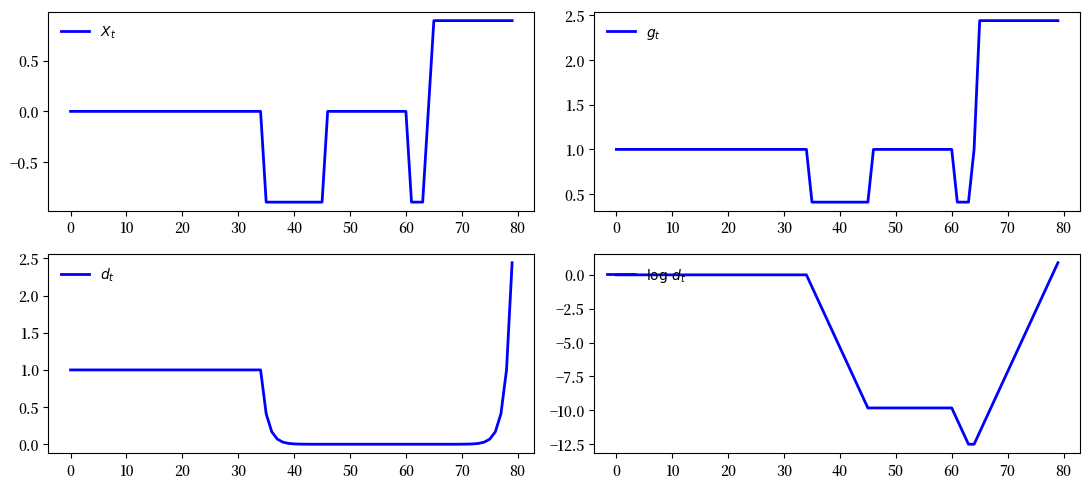

In [3]:
n = 7
mc = qe.tauchen(n, 0.96, 0.25)
sim_length = 80

x_series = mc.simulate(sim_length, init=np.median(mc.state_values))
g_series = np.exp(x_series)
d_series = np.cumprod(g_series) # 假设 d_0 = 1

series = [x_series, g_series, d_series, np.log(d_series)]
labels = ['$X_t$', '$g_t$', '$d_t$', r'$\log \, d_t$']

fig, axes = plt.subplots(2, 2)
for ax, s, label in zip(axes.flatten(), series, labels):
    ax.plot(s, 'b-', lw=2, label=label)
    ax.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

#### 定价公式

在这种情况下，让我们从确定性增长的情况来调整我们的分析，以获得资产价格。

在那种情况下，我们发现 $v$ 是常数。

这鼓励我们猜测，在当前情况下，$v_t$ 是状态 $X_t$ 的固定函数。

我们寻找一个函数 $v$，使得价格-股息比满足 $v_t = v(X_t)$。

我们可以将这个猜测代入 {eq}`pdex` 得到

$$
v(X_t) = \beta {\mathbb E}_t [ g(X_{t+1}) (1 + v(X_{t+1})) ]
$$

如果我们以 $X_t = x$ 为条件，这变成

$$
v(x) = \beta \sum_{y \in S}  g(y) (1 + v(y)) P(x, y)
$$

或

```{math}
:label: pstack

v(x) = \beta \sum_{y \in S}   K(x, y) (1 + v(y))
\quad \text{where} \quad
K(x, y) := g(y) P(x, y)
```

假设有 $n$ 个可能的状态 $x_1, \ldots, x_n$。

我们可以将 {eq}`pstack` 看作 $n$ 个堆叠的方程，每个状态对应一个方程，并以矩阵形式写成

```{math}
:label: vcumrn

v = \beta K (\mathbb 1 + v)
```

这里

* $v$ 被理解为列向量 $(v(x_1), \ldots, v(x_n))'$。
* $K$ 是矩阵 $(K(x_i, x_j))_{1 \leq i, j \leq n}$。
* ${\mathbb 1}$ 是一个全为1的列向量。

方程 {eq}`vcumrn` 何时有唯一解？

根据{ref}`诺伊曼级数引理 <la_neumann>`和盖尔范德公式，当 $\beta K$ 的谱半径严格小于1时，方程 {eq}`vcumrn` 有唯一解。

因此，我们要求 $K$ 的特征值的模严格小于 $\beta^{-1}$。

解为

```{math}
:label: rned

v = (I - \beta K)^{-1} \beta K{\mathbb 1}
```

### 代码

让我们计算并绘制某些参数下的价格-股息比。

和之前一样，我们将生成 $\{X_t\}$ 作为一个{ref}`离散化的AR1过程 <fm_ex3>`，并设定 $g_t = \exp(X_t)$。

这是代码，包括对谱半径条件的测试

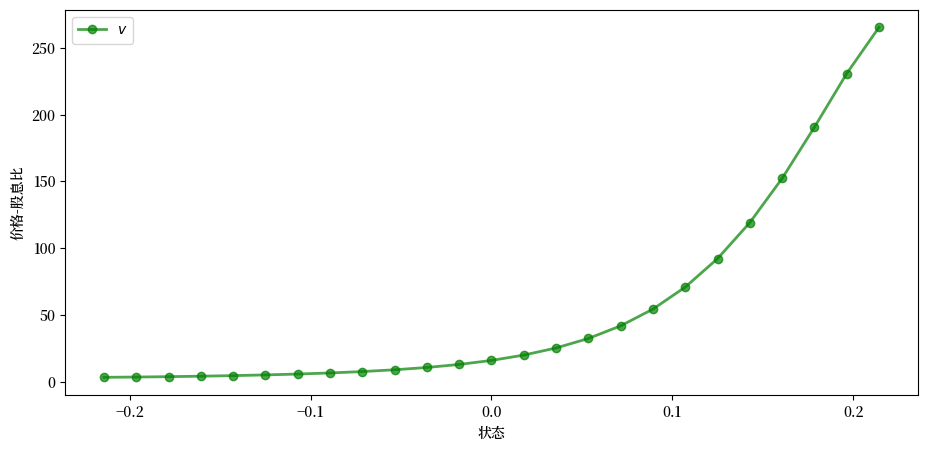

In [4]:
n = 25  # 状态空间大小
β = 0.9
mc = qe.tauchen(n, 0.96, 0.02)

K = mc.P * np.exp(mc.state_values)

warning_message = "谱半径条件不满足"
assert np.max(np.abs(eigvals(K))) < 1 / β,  warning_message

I = np.identity(n)
v = solve(I - β * K, β * K @ np.ones(n))

fig, ax = plt.subplots()
ax.plot(mc.state_values, v, 'g-o', lw=2, alpha=0.7, label='$v$')
ax.set_ylabel("价格-股息比")
ax.set_xlabel("状态")
ax.legend(loc='upper left')
plt.show()

为什么价格-股息比率随状态增加？

原因是这个马尔可夫过程具有正相关性，所以当前的高状态预示着未来的高状态。

此外，股息增长随状态增加。

对未来高股息增长的预期导致了高价格-股息比率。

## 风险规避与资产价格

现在让我们来看看当代理人具有风险规避性时的情况。

我们将对几种不同的资产定价，包括：

* 禀赋流
* 永续债券（19世纪英国政府发行的一种债券）
* 永续债券的看涨期权

### 卢卡斯树模型定价

```{index} single: Finite Markov Asset Pricing; Lucas Tree
```

让我们从Robert E. Lucas, Jr.的著名资产定价模型的一个版本开始 {cite}`Lucas1978`。

卢卡斯考虑了一个具有以下特征的抽象纯交换经济：

* 一种不可储存的消费品
* 一个控制每期可获得的消费品总量的马尔可夫过程

* 一棵单独的*树*，每个时期产出的*果实*等于经济体可用的总消费量
* 一个*股份*的竞争市场，股份所有者有权获得相应比例的*股息*流，即树产出的*果实*流

* 一个代表性消费者在竞争均衡中

    * 每期消费经济体的全部禀赋
    * 拥有树的100%股份

如{cite}`Lucas1978`所述，我们假设随机贴现因子的形式为

```{math}
:label: lucsdf

m_{t+1} = \beta \frac{u'(c_{t+1})}{u'(c_t)}
```

其中$u$是一个凹效用函数，$c_t$是代表性消费者在$t$时期的消费。

(这个表达式的推导在[后面的讲座](https://python-advanced.quantecon.org/lucas_model.html)中给出)

假设存在一个遵循增长过程{eq}`mass_fmce`的禀赋。

定价的资产是对禀赋过程的一种权利要求，即上述所描述的*卢卡斯树*。

根据{cite}`Lucas1978`，我们假设在均衡状态下，代表性消费者的消费等于总体禀赋，因此对所有时间$t$都有$d_t = c_t$。

对于效用函数，我们采用**常相对风险厌恶**（CRRA）规范

```{math}
:label: eqCRRA

u(c) = \frac{c^{1-\gamma}}{1 - \gamma} \ {\rm with} \ \gamma > 0
```

当$\gamma =1$时，我们令$u(c) = \ln c$。

将CRRA规范代入{eq}`lucsdf`并使用$c_t = d_t$得到

```{math}
:label: lucsdf2

m_{t+1}
= \beta \left(\frac{c_{t+1}}{c_t}\right)^{-\gamma}
= \beta g_{t+1}^{-\gamma}
```

将此代入{eq}`pdex`得到价格-股息比率公式

$$
v(X_t)
= \beta {\mathbb E}_t
\left[
    g(X_{t+1})^{1-\gamma} (1 + v(X_{t+1}) )
\right]
$$ (eq:neweqn101)

在$X_t = x$的条件下，我们可以将其写作

$$
v(x)
= \beta \sum_{y \in S} g(y)^{1-\gamma} (1 + v(y) ) P(x, y)
$$

如果我们令

$$
J(x, y) := g(y)^{1-\gamma}  P(x, y)
$$

那么我们可以将方程 {eq}`eq:neweqn101` 用向量形式重写为

$$
v = \beta J ({\mathbb 1} + v )
$$

假设 $J$ 的谱半径严格小于 $\beta^{-1}$，这个方程有唯一解

```{math}
:label: resolvent2

v = (I - \beta J)^{-1} \beta  J {\mathbb 1}
```

我们将定义一个函数 tree_price 来计算 $v$，其参数存储在 AssetPriceModel 类中

In [5]:
class AssetPriceModel:
    """
    一个存储资产定价模型基本要素的类。

    参数
    ----------
    β : 标量, float
        贴现因子
    mc : MarkovChain
        包含状态过程的转移矩阵和状态值集合
    γ : 标量(float)
        风险厌恶系数
    g : 可调用对象
        将状态映射到增长率的函数

    """
    def __init__(self, β=0.96, mc=None, γ=2.0, g=np.exp):
        self.β, self.γ = β, γ
        self.g = g

        # Markov链的默认过程
        if mc is None:
            self.ρ = 0.9
            self.σ = 0.02
            self.mc = qe.tauchen(n, self.ρ, self.σ)
        else:
            self.mc = mc

        self.n = self.mc.P.shape[0]

    def test_stability(self, Q):
        """
        对给定矩阵Q进行稳定性测试。
        """
        sr = np.max(np.abs(eigvals(Q)))
        if not sr < 1 / self.β:
            msg = f"谱半径条件失败，半径 = {sr}"
            raise ValueError(msg)


def tree_price(ap):
    """
    计算卢卡斯树的价格-股息比率。

    参数
    ----------
    ap: AssetPriceModel
        包含基本要素的AssetPriceModel实例

    返回值
    -------
    v : array_like(float)
        卢卡斯树价格-股息比率

    """
    # 简化名称，设置矩阵
    β, γ, P, y = ap.β, ap.γ, ap.mc.P, ap.mc.state_values
    J = P * ap.g(y)**(1 - γ)

    # 确保存在唯一解
    ap.test_stability(J)

    # 计算v
    I = np.identity(ap.n)
    Ones = np.ones(ap.n)
    v = solve(I - β * J, β * J @ Ones)

    return v

这是在几个不同 $\gamma$ 值下 $v$ 作为状态函数的图表，
其中包含一个正相关的马尔可夫过程和 $g(x) = \exp(x)$

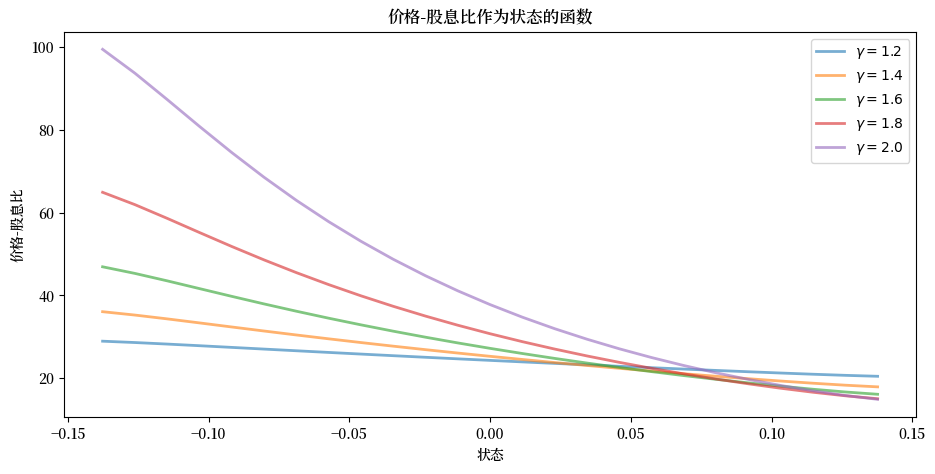

In [6]:
γs = [1.2, 1.4, 1.6, 1.8, 2.0]
ap = AssetPriceModel()
states = ap.mc.state_values

fig, ax = plt.subplots()

for γ in γs:
    ap.γ = γ
    v = tree_price(ap)
    ax.plot(states, v, lw=2, alpha=0.6, label=rf"$\gamma = {γ}$")

ax.set_title('价格-股息比作为状态的函数')
ax.set_ylabel("价格-股息比")
ax.set_xlabel("状态")
ax.legend(loc='upper right')
plt.show()

注意在每种情况下$v$都是递减的。

这是因为，在状态过程正相关的情况下，较高的状态意味着未来消费增长更高。

根据随机贴现因子{eq}`lucsdf2`，更高的增长会降低贴现因子，从而降低对未来股息的权重。

#### 特殊情况

在特殊情况$\gamma =1$时，我们有$J = P$。

回想一下对所有$i$都有$P^i {\mathbb 1} = {\mathbb 1}$，并应用{ref}`诺伊曼几何级数引理 <la_neumann>`，我们得到

$$
v = \beta(I-\beta P)^{-1} {\mathbb 1}
= \beta \sum_{i=0}^{\infty} \beta^i P^i {\mathbb 1}
= \beta \frac{1}{1 - \beta} {\mathbb 1}
$$

因此，在对数效用偏好下，卢卡斯树的价格-股息比是常数。

另外，如果$\gamma = 0$，那么$J = K$，我们就得到了风险中性解{eq}`rned`。

这是符合预期的，因为$\gamma = 0$意味着$u(c) = c$（因此代理人是风险中性的）。

### 无风险永续债券

考虑相同的纯交换代表性代理人经济。

一个无风险永续债承诺每期支付固定金额 $\zeta> 0$。

沿用之前的符号，让 $p_t$ 现在表示除息永续债权的价格。

在t期末，除息永续债权的所有者有权获得：

* 第t+1期的 $\zeta$ 收益，以及
* 下一期以 $p_{t+1}$ 价格出售该权益的权利

价格满足{eq}`lteeqs0`，其中 $d_t = \zeta$，即

$$
p_t = {\mathbb E}_t \left[ m_{t+1}  ( \zeta + p_{t+1} ) \right]
$$

结合随机贴现因子{eq}`lucsdf2`，这变成

```{math}
:label: consolguess1

p_t
= {\mathbb E}_t \left[ \beta g_{t+1}^{-\gamma}  ( \zeta + p_{t+1} ) \right]
```

假设解的形式为 $p_t = p(X_t)$ 并且在条件 $X_t = x$ 下，我们得到

$$
p(x)
= \beta \sum_{y \in S}  g(y)^{-\gamma} (\zeta + p(y)) P(x, y)
$$

令 $M(x, y) = P(x, y) g(y)^{-\gamma}$ 并用向量符号重写，得到解

```{math}
:label: consol_price

p = (I - \beta M)^{-1} \beta M \zeta {\mathbb 1}
```

上述公式在函数consol_price中实现。

In [7]:
def consol_price(ap, ζ):
    """
    计算支付额为ζ的永续债券价格

    参数
    ----------
    ap: AssetPriceModel
        包含基本要素的AssetPriceModel实例

    ζ : 标量(float)
        永续债券的票息

    返回值
    -------
    p : array_like(float)
        永续债券价格

    """
    # 简化名称，设置矩阵
    β, γ, P, y = ap.β, ap.γ, ap.mc.P, ap.mc.state_values
    M = P * ap.g(y)**(- γ)

    # 确保存在唯一解
    ap.test_stability(M)

    # 计算价格
    I = np.identity(ap.n)
    Ones = np.ones(ap.n)
    p = solve(I - β * M, β * ζ * M @ Ones)

    return p

### 定价购买永续债券的期权

让我们现在来为不同期限的期权定价。

我们将研究一个期权，它赋予持有人以价格$p_S$购买永续债券的权利。

#### 无限期限看涨期权

我们要为以价格$p_S$购买永续债券的*无限期限*期权定价。

该期权赋予持有人在期初两个选择：

1. 现在以价格$p_S$购买债券，或者
1. 现在不行使购买资产的期权，但保留以后行使的权利

因此，持有人要么现在*行使*期权，要么选择*不行使*并等到下一期。

这被称为具有*执行价格*$p_S$的无限期限*看涨期权*。

期权持有人有权在任何期初以价格$p_S$购买永续债券，此时息票已支付给债券的前任持有人。

经济基本面与上述相同，包括随机贴现因子和消费过程。

设 $w(X_t, p_S)$ 为在已知时间 $t$ 的增长状态为 $X_t$ 但*在*所有者决定是否在时间 $t$（即今天）行使期权*之前*的期权价值。

回顾 $p(X_t)$ 是初始增长状态为 $X_t$ 时永续债券的价值，期权价值满足

$$
w(X_t, p_S)
= \max \left\{
    \beta \, {\mathbb E}_t \frac{u'(c_{t+1})}{u'(c_t)} w(X_{t+1}, p_S), \;
         p(X_t) - p_S
\right\}
$$

右边的第一项是等待的价值，而第二项是立即行使的价值。

我们也可以将其写作

```{math}
:label: FEoption0

w(x, p_S)
= \max \left\{
    \beta \sum_{y \in S} P(x, y) g(y)^{-\gamma}
    w (y, p_S), \;
    p(x) - p_S
\right\}
```

其中 $M(x, y) = P(x, y) g(y)^{-\gamma}$ 且 $w$ 作为向量

对于值 $(w(x_i), p_S)_{i = 1}^n$，我们可以将 {eq}`FEoption0` 表示为非线性向量方程

```{math}
:label: FEoption

w = \max \{ \beta M w, \; p - p_S {\mathbb 1} \}
```

为了求解 {eq}`FEoption`，构造一个算子 $T$，将向量 $w$ 映射到向量 $Tw$，通过

$$
T w
= \max \{ \beta M w,\; p - p_S {\mathbb 1} \}
$$

从某个初始 $w$ 开始，通过 $T$ 迭代直至收敛。

我们可以通过以下 call_option 函数找到解

In [8]:
def call_option(ap, ζ, p_s, ϵ=1e-7):
    """
    计算永续债券看涨期权的价格。

    参数
    ----------
    ap: AssetPriceModel
        包含基本要素的AssetPriceModel实例

    ζ : scalar(float)
        永续债券的息票

    p_s : scalar(float)
        执行价格

    ϵ : scalar(float), optional(default=1e-8)
        无限期问题的容差

    返回值
    -------
    w : array_like(float)
        无限期看涨期权价格

    """
    # 简化名称，设置矩阵
    β, γ, P, y = ap.β, ap.γ, ap.mc.P, ap.mc.state_values
    M = P * ap.g(y)**(- γ)

    # 确保存在唯一的永续债券价格
    ap.test_stability(M)

    # 计算期权价格
    p = consol_price(ap, ζ)
    w = np.zeros(ap.n)
    error = ϵ + 1
    while error > ϵ:
        # 在列之间取最大值
        w_new = np.maximum(β * M @ w, p - p_s)
        # 找到每个分量的最大差异并更新
        error = np.amax(np.abs(w - w_new))
        w = w_new

    return w

当 $P_S = 40$ 时，这是 $w$ 与永续债价格的对比图

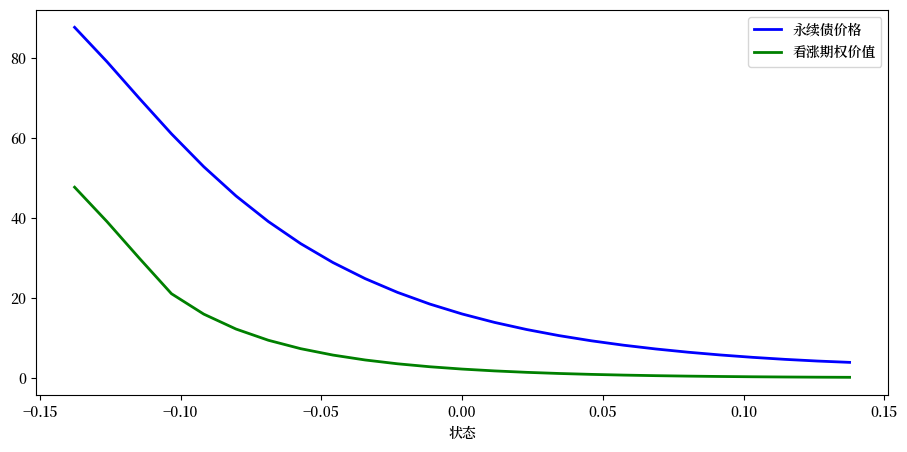

In [9]:
ap = AssetPriceModel(β=0.9)
ζ = 1.0
strike_price = 40

x = ap.mc.state_values
p = consol_price(ap, ζ)
w = call_option(ap, ζ, strike_price)

fig, ax = plt.subplots()
ax.plot(x, p, 'b-', lw=2, label='永续债价格')
ax.plot(x, w, 'g-', lw=2, label='看涨期权价值')
ax.set_xlabel("状态")
ax.legend(loc='upper right')
plt.show()

在马尔可夫增长状态的高值时，期权的价值接近于零。

尽管马尔可夫链是不可约的，且低状态（永续债券价格较高的状态）会被反复访问，但情况仍是如此。

在马尔可夫增长状态较高时估值较低的原因是$\beta=0.9$，因此未来收益被大幅贴现。

### 无风险利率

让我们看看不同期限的无风险利率。

#### 一期无风险利率

如前所述，随机贴现因子是$m_{t+1} = \beta g_{t+1}^{-\gamma}$。

因此，在状态$x$下的无风险利率$R_t$的倒数$R_t^{-1}$为

$$
{\mathbb E}_t m_{t+1} = \beta \sum_{y \in S} P(x, y) g(y)^{-\gamma}
$$

我们可以将其写作

$$
m_1 = \beta M {\mathbb 1}
$$

其中$m_1$的第$i$个元素是状态$x_i$中一期无风险总利率的倒数。

#### 其他期限

设 $m_j$ 为一个 $n \times 1$ 向量，其第 $i$ 个分量是状态 $x_i$ 下第 $j$ 期无风险利率总收益的倒数。

则 $m_1 = \beta M$，且对于 $j \geq 1$，有 $m_{j+1} = M m_j$。

## 练习

```{exercise}
:label: ma_ex1

在讲座中，我们考虑了**除息资产**。

**含息资产**是对收益流 $d_t, d_{t+1}, \ldots$ 的一种权利要求。

根据{eq}`rnapex`，请找出一单位含息资产的风险中性资产定价方程。

当股息流为常数且非随机时，即 $d_t = d > 0$，含息资产的均衡价格是多少？

当股息流以非随机方式增长，即 $d_t = g d_t$ 且 $0 < g \beta < 1$ 时，含息资产的均衡价格是多少？
```

```{solution} ma_ex1
:class: dropdown

对于含息资产，基本的风险中性资产定价方程是

$$
p_t = d_t + \beta {\mathbb E}_t [ p_{t+1} ]
$$

(mass_ex1)=
当股息为常数时，均衡价格为

$$

p_t = \frac{1}{1-\beta} d_t
$$

对于一个增长的、非随机的股息过程，均衡价格为

$$
p_t = \frac{1}{1 - \beta g} d_t
$$
```

```{exercise-start}
:label: ma_ex2
```

考虑以下基本要素

In [10]:
n = 5  # 状态空间大小
P = np.full((n, n), 0.0125)
P[range(n), range(n)] += 1 - P.sum(1)
# 马尔可夫链的状态值
s = np.array([0.95, 0.975, 1.0, 1.025, 1.05])
γ = 2.0
β = 0.94

令 $g$ 由 $g(x) = x$ 定义（即 $g$ 是恒等映射）。

计算 Lucas 树的价格。

对以下情况进行相同的计算：

* 当 $\zeta = 1$ 时无风险永续债券的价格
* 当 $\zeta = 1$ 且 $p_S = 150.0$ 时永续债券的看涨期权价格

```{exercise-end}
```

```{solution-start} ma_ex2
:class: dropdown
```

首先，让我们输入参数：

In [11]:
n = 5
P = np.full((n, n), 0.0125)
P[range(n), range(n)] += 1 - P.sum(1)
s = np.array([0.95, 0.975, 1.0, 1.025, 1.05])  # 状态值
mc = qe.MarkovChain(P, state_values=s)

γ = 2.0
β = 0.94
ζ = 1.0
p_s = 150.0

接下来，我们将创建一个`AssetPriceModel`实例来输入到这些函数中

In [12]:
apm = AssetPriceModel(β=β, mc=mc, γ=γ, g=lambda x: x)

现在我们只需要对数据调用相关函数：

In [13]:
tree_price(apm)

array([29.47401578, 21.93570661, 17.57142236, 14.72515002, 12.72221763])

In [14]:
consol_price(apm, ζ)

array([753.87100476, 242.55144082, 148.67554548, 109.25108965,
        87.56860139])

In [15]:
call_option(apm, ζ, p_s)

array([603.87100476, 176.8393343 , 108.67734499,  80.05179254,
        64.30843748])

让我们将最后两个函数绘制成图表

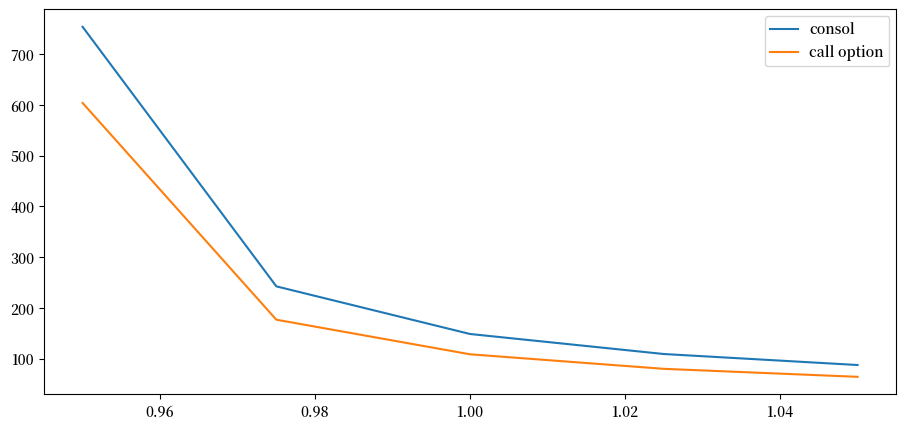

In [16]:
fig, ax = plt.subplots()
ax.plot(s, consol_price(apm, ζ), label='consol')
ax.plot(s, call_option(apm, ζ, p_s), label='call option')
ax.legend()
plt.show()

```{solution-end}
```

```{exercise}
:label: ma_ex3

让我们考虑有限期限的看涨期权,这比无限期限的更常见。

有限期限期权遵循与{eq}`FEoption0`密切相关的函数方程。

一个k期期权在k期后到期。

如果我们将今天视为日期零,k期期权赋予所有者在日期0、1、...、k-1时以执行价格$p_S$行使期权购买无风险永续债的权利。

该期权在时间k到期。

因此,对于k=1,2,...,让w(x,k)表示k期期权的价值。

它遵循

$$
w(x, k)
= \max \left\{
    \beta \sum_{y \in S} P(x, y) g(y)^{-\gamma}
    w (y, k-1), \;
    p(x) - p_S
\right\}
$$

其中对所有x,w(x,0) = 0。

我们可以将其表示为一系列非线性向量方程

$$
w_k = \max \{ \beta M w_{k-1}, \; p - p_S {\mathbb 1} \}
  \quad k =1, 2, \ldots
  \quad \text{with } w_0 = 0
$$

编写一个函数来计算任意给定k的$w_k$。

使用{ref}`ma_ex1`中的参数值计算`k = 5`和`k = 25`时的期权价值。

哪个更高？你能解释其中的原因吗？
```

```{solution-start} ma_ex3
:class: dropdown
```

这里是一个合适的函数：

In [17]:
def finite_horizon_call_option(ap, ζ, p_s, k):
    """
    计算k期期权价值。
    """
    # 简化名称，设置矩阵
    β, γ, P, y = ap.β, ap.γ, ap.mc.P, ap.mc.state_values
    M = P * ap.g(y)**(- γ)

    # 确保存在唯一解
    ap.test_stability(M)


    # 计算期权价格
    p = consol_price(ap, ζ)
    w = np.zeros(ap.n)
    for i in range(k):
        # 在列之间取最大值
        w = np.maximum(β * M @ w, p - p_s)

    return w

现在让我们计算在`k=5`和`k=25`时的期权价值

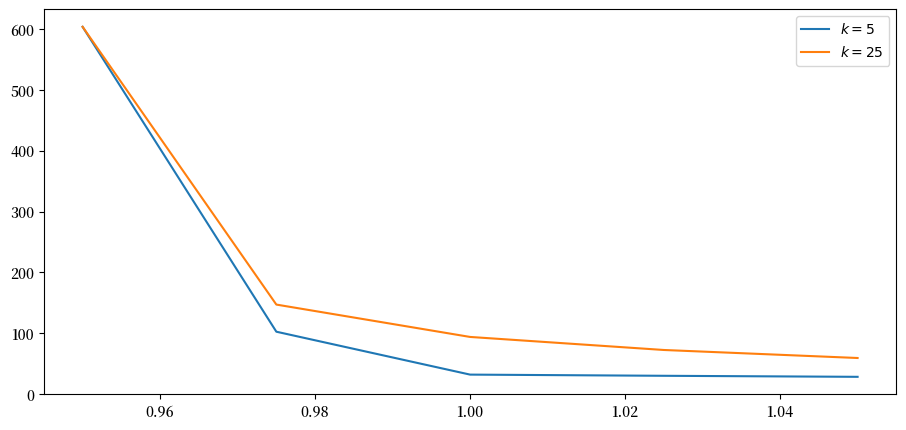

In [18]:
fig, ax = plt.subplots()
for k in [5, 25]:
    w = finite_horizon_call_option(apm, ζ, p_s, k)
    ax.plot(s, w, label=rf'$k = {k}$')
ax.legend()
plt.show()

不出所料，具有更大$k$值的期权价值更高。

这是因为期权持有人有更长的时间范围来行使期权。

```{solution-end}
```